In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [5]:
retail_df = pd.read_excel('Online Retail project 3.xlsx')

In [6]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
retail_df.shape

(541909, 8)

In [8]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


DATA CLEANING

1. Perform a preliminary data inspection and data cleaning.

1.a.Check for missing data and formulate an apt strategy to treat them.

In [9]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
 retail_df['Description'] = retail_df['Description'].fillna(retail_df['Description'].value_counts().index[0])

In [11]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 1.a.Remove duplicate data records.

In [12]:
 retail_df.dropna(axis=0,inplace=True)

In [13]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


1.c.Perform descriptive analytics on the given data.

In [113]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID,Invoice_Month_Counts,Total_Price
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,5.187227,20.613638
std,250.283037,69.764035,1714.006089,3.856358,430.352218
min,-80995.000000,0.000000,12346.000000,1.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,1.000000,4.250000
50%,5.000000,1.950000,15145.000000,4.000000,11.700000
75%,12.000000,3.750000,16784.000000,8.000000,19.800000
max,80995.000000,38970.000000,18287.000000,13.000000,168469.600000


DATA TRANSFORMATION : 

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

2.a. Create month cohorts and analyze active customers for each cohort.

In [114]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
retail_df['Invoice_Month'] = retail_df['InvoiceDate'].apply(get_month)
group = retail_df.groupby('CustomerID')['Invoice_Month']
retail_df['First_Invoice_Month'] = group.transform(min)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,First_Invoice_Month,Invoice_Month_Counts,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [17]:
def get_date_int(df,column):
        year=df[column].dt.year
        month=df[column].dt.month
        day=df[column].dt.day
        return year,month,day
calc_invoice_year,calc_invoice_month,_ = get_date_int(retail_df,'Invoice_Month')
calc_first_invoice_year,calc_first_invoice_month,_ = get_date_int(retail_df,'First_Invoice_Month')

years_difference = calc_invoice_year - calc_first_invoice_year
months_difference = calc_invoice_month - calc_first_invoice_month
retail_df['Invoice_Month_Counts'] = (years_difference * 12) + months_difference + 1
retail_df.head()
        

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,First_Invoice_Month,Invoice_Month_Counts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [127]:
retail_df.drop(retail_df[retail_df["Quantity"]<0].index,inplace = True)
retail_df.describe()

,Quantity,UnitPrice,CustomerID,Invoice_Month_Counts,Total_Price
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822,5.181340,22.629195
std,181.588420,22.240725,1713.567773,3.858006,311.083465
min,1.000000,0.000000,12346.000000,1.000000,0.000000
25%,2.000000,1.250000,13955.000000,1.000000,4.950000
50%,6.000000,1.950000,15150.000000,4.000000,12.390000
75%,12.000000,3.750000,16791.000000,8.000000,19.800000
max,80995.000000,8142.750000,18287.000000,13.000000,168469.600000


2.a. Create month cohorts and analyze active customers for each cohort

In [128]:
groupdata = retail_df.groupby(['First_Invoice_Month','Invoice_Month_Counts'])
cohort_data = groupdata['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,First_Invoice_Month,Invoice_Month_Counts,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,334
2,2010-12-01,3,294
3,2010-12-01,4,354
4,2010-12-01,5,330


In [129]:
cohort_analyze = cohort_data.pivot(index = 'First_Invoice_Month',
                                   columns = 'Invoice_Month_Counts',
                                   values = 'CustomerID')
cohort_analyze.head()

Invoice_Month_Counts,1,2,3,4,5,6,7,8,9,10,11,12,13
First_Invoice_Month,,,,,,,,,,,,,
2010-12-01,885.0,334.0,294.0,354.0,330.0,365.0,338.0,318.0,322.0,364.0,347.0,465.0,236.0
2011-01-01,407.0,92.0,112.0,95.0,137.0,122.0,104.0,102.0,128.0,138.0,152.0,53.0,NaN
2011-02-01,372.0,70.0,68.0,105.0,97.0,92.0,93.0,102.0,91.0,113.0,25.0,NaN,NaN
2011-03-01,438.0,66.0,107.0,85.0,97.0,73.0,113.0,99.0,119.0,36.0,NaN,NaN,NaN
2011-04-01,297.0,64.0,62.0,62.0,59.0,68.0,66.0,78.0,22.0,NaN,NaN,NaN,NaN


2.b. Analyze the retention rate of customers.

In [130]:
cohort_sizes = cohort_analyze.iloc[:,0]
retention = cohort_analyze.divide(cohort_sizes, axis=0)
retention_rate=retention.round(3)*100
retention_rate

Invoice_Month_Counts,1,2,3,4,5,6,7,8,9,10,11,12,13
First_Invoice_Month,,,,,,,,,,,,,
2010-12-01,100.0,37.7,33.2,40.0,37.3,41.2,38.2,35.9,36.4,41.1,39.2,52.5,26.7
2011-01-01,100.0,22.6,27.5,23.3,33.7,30.0,25.6,25.1,31.4,33.9,37.3,13.0,NaN
2011-02-01,100.0,18.8,18.3,28.2,26.1,24.7,25.0,27.4,24.5,30.4,6.7,NaN,NaN
2011-03-01,100.0,15.1,24.4,19.4,22.1,16.7,25.8,22.6,27.2,8.2,NaN,NaN,NaN
2011-04-01,100.0,21.5,20.9,20.9,19.9,22.9,22.2,26.3,7.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.1,17.3,16.9,20.9,23.7,26.3,9.7,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.5,16.2,26.9,23.1,33.3,9.4,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.2,20.9,21.9,27.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.4,25.1,23.4,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


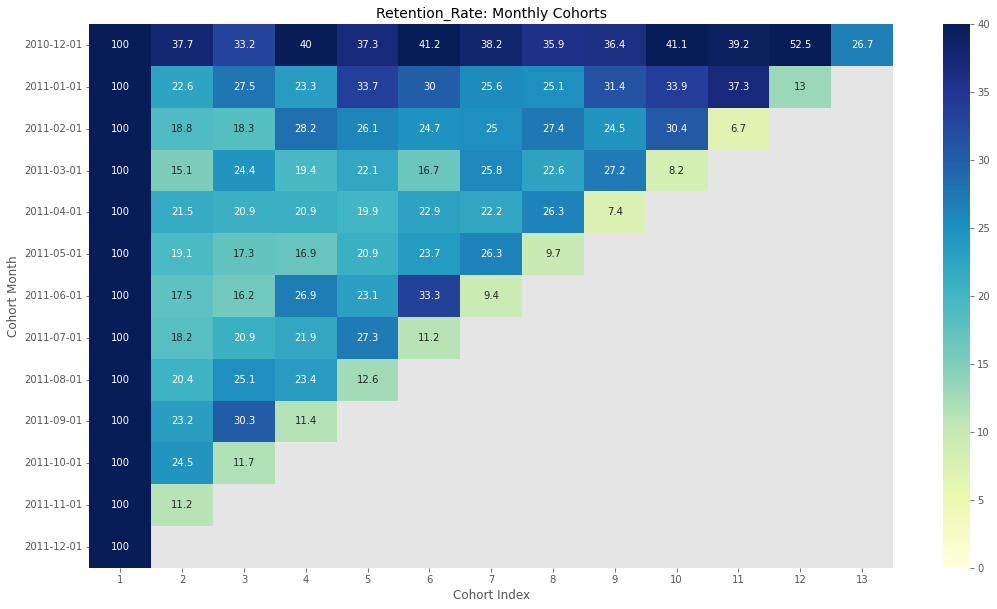

In [131]:
retention_rate.index = retention_rate.index.strftime('%Y-%m-%d')
# Initialize the figure
plt.figure(figsize=(18, 10))
# Adding a title
plt.title('Retention_Rate: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention_rate, annot = True,vmin = 0.0, vmax = 40,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

DATA MODELING : 

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

In [132]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [133]:
last_invoice = retail_df['InvoiceDate'].max()
last_invoice

Timestamp('2011-12-09 12:50:00')

In [134]:
last_invoice = dt.datetime(2011,12,10,13,0,0)
last_invoice

datetime.datetime(2011, 12, 10, 13, 0)

In [135]:
retail_df= retail_df.drop_duplicates()
retail_df.describe()

,Quantity,UnitPrice,CustomerID,Invoice_Month_Counts,Total_Price
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822,5.181340,22.629195
std,181.588420,22.240725,1713.567773,3.858006,311.083465
min,1.000000,0.000000,12346.000000,1.000000,0.000000
25%,2.000000,1.250000,13955.000000,1.000000,4.950000
50%,6.000000,1.950000,15150.000000,4.000000,12.390000
75%,12.000000,3.750000,16791.000000,8.000000,19.800000
max,80995.000000,8142.750000,18287.000000,13.000000,168469.600000


In [136]:
recency = (last_invoice - retail_df.groupby("CustomerID").agg({"InvoiceDate":"max"}))
recency.rename(columns = {"InvoiceDate":"Recency"}, inplace = True)
recency_data = recency["Recency"].apply(lambda x: x.days)
recency_data.head()

CustomerID
12346    326
12347      2
12348     75
12349     19
12350    310
Name: Recency, dtype: int64

In [137]:
frequency_data = retail_df.groupby("CustomerID").agg({"InvoiceDate":"nunique"})
frequency_data.rename(columns = {"InvoiceDate":"Frequency"}, inplace = True)
frequency_data.head()

,Frequency
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [138]:
retail_df['Total_Price'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,First_Invoice_Month,Invoice_Month_Counts,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [139]:
retail_df.to_excel("Tableau_1.xlsx")

In [140]:
monetary_data = retail_df.groupby("CustomerID").agg({"Total_Price":"sum"})
monetary_data.rename(columns={"Total_Price":"Monetary"}, inplace = True)
monetary_data.head()

,Monetary
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [141]:
rfm_df = pd.concat([recency_data,frequency_data,monetary_data], axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

In [142]:
rfm_df["Recency_Score"] = pd.qcut(rfm_df["Recency"], 4, labels = [ 4,3,2,1]) 
rfm_df["Frequency_Score"]= pd.qcut(rfm_df["Frequency"].rank(method="first"),4, labels=[1,2,3,4])
rfm_df["Monetary_Score"] = pd.qcut(rfm_df["Monetary"], 4, labels = [1, 2, 3, 4])
rfm_df.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12347,2,7,4310.00,4,4,4
12348,75,4,1797.24,2,3,4
12349,19,1,1757.55,3,1,4
12350,310,1,334.40,1,1,2


3.b1. Combine three ratings to get a RFM segment (as strings)

In [302]:
rfm_df["RFM_Segment"] = (rfm_df["Recency_Score"].astype(str) + 
                    rfm_df["Frequency_Score"].astype(str) + 
                    rfm_df["Monetary_Score"].astype(str))
rfm_df_1=rfm_df.reset_index()
#rfm_df_1 = rfm_df_1.drop(rfm_df_1['Customer ID'],axis=1)
rfm_df_1.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment,Segmentation,RFM_Score,Customer ID
0,12346,326,1,77183.60,1,1,4,114,Focus on old Cutomer,6,17259.0
1,12347,2,7,4310.00,4,4,4,444,Loyal Customer,12,17259.0
2,12348,75,4,1797.24,2,3,4,234,Old Loyal customer,9,17259.0
3,12349,19,1,1757.55,3,1,4,314,Balanced new customer,8,17259.0
4,12350,310,1,334.40,1,1,2,112,Low base Cutomer,4,17259.0


In [144]:
Segment = {
    r'[1-2][1-2][1-2]': 'Low base Cutomer',
    r'[1-2][1-2][2-3]': 'Rare base Cutomer',
    r'[1-2][1-2][3-4]': 'Focus on old Cutomer',
    r'[1-2][3-4][1-2]': 'Almost rare Customer',
    r'[1-2][3-4][2-3]': 'Focusing customer on their regular visits',
    r'[1-2][3-4][3-4]': 'Old Loyal customer', 
    r'[2-3][1-2][2-3]': 'Focusing customer on their purchase',
    r'[2-3][2-3][2-3]': 'Balanced customer',
    r'[2-3][2-3][3-4]': 'Balanced Loyal Customer',
    r'[3-4][3-4][3-4]': 'Loyal Customer',
    r'[3-4][1-2][3-4]': 'Balanced new customer',
    r'[3-4][1-2][1-2]': 'New Customer',
    r'[3-4][2-3][3-4]': 'Potential customer',
    r'[3-4][2-3][1-2]': 'Mid level-regular customer',
    r'[3-4][2-3][1-2]': 'Need based Customer',
    r'[3-4][3-4][1-2]': 'Wandering Customer',
    r'444': 'VIP customer'
}

In [145]:
rfm_df_1['Segmentation'] = rfm_df_1['Recency_Score'].astype(str) + rfm_df_1['Frequency_Score'].astype(str) +  rfm_df_1['Monetary_Score'].astype(str)
rfm_df_1['Segmentation'] = rfm_df_1['Segmentation'].replace(Segment, regex=True)
rfm_df_1.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment,Segmentation
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,114,Focus on old Cutomer
12347,2,7,4310.00,4,4,4,444,Loyal Customer
12348,75,4,1797.24,2,3,4,234,Old Loyal customer
12349,19,1,1757.55,3,1,4,314,Balanced new customer
12350,310,1,334.40,1,1,2,112,Low base Cutomer


In [146]:
rfm_df_1['Segmentation'].unique()

array(['Focus on old Cutomer', 'Loyal Customer', 'Old Loyal customer',
       'Balanced new customer', 'Low base Cutomer', 'Rare base Cutomer',
       'Balanced Loyal Customer', 'New Customer',
       'Focusing customer on their regular visits',
       'Focusing customer on their purchase', 'Almost rare Customer',
       'Balanced customer', 'Need based Customer', 'Wandering Customer'],
      dtype=object)

3.b2. Get the RFM score by adding up the three ratings.

In [147]:
rfm_df_1["RFM_Score"] = rfm_df_1['Recency_Score'].astype(int) + rfm_df_1['Frequency_Score'].astype(int) +  rfm_df_1['Monetary_Score'].astype(int)
rfm_df_1.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment,Segmentation,RFM_Score
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,4,114,Focus on old Cutomer,6
12347,2,7,4310.00,4,4,4,444,Loyal Customer,12
12348,75,4,1797.24,2,3,4,234,Old Loyal customer,9
12349,19,1,1757.55,3,1,4,314,Balanced new customer,8
12350,310,1,334.40,1,1,2,112,Low base Cutomer,4


3.b3. Analyze the RFM segments by summarizing them and comment on the findings.

In [296]:
cust_group = retail_df.groupby("CustomerID").agg({"CustomerID":"count"})
cust_group.rename(columns={"CustomerID":"Customer_counts"}, inplace=True)
rfm_df_1.rename(columns={"Customer_counts":"Customer_segment_counts"}, inplace=True)

In [297]:
rfm_df_1.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment,Segmentation,RFM_Score,Customer ID
CustomerID,,,,,,,,,,
12346,326,1,77183.60,1,1,4,114,Focus on old Cutomer,6,17259.0
12347,2,7,4310.00,4,4,4,444,Loyal Customer,12,17259.0
12348,75,4,1797.24,2,3,4,234,Old Loyal customer,9,17259.0
12349,19,1,1757.55,3,1,4,314,Balanced new customer,8,17259.0
12350,310,1,334.40,1,1,2,112,Low base Cutomer,4,17259.0


In [294]:
rfm_df_1['Customer ID'] = retail_df['CustomerID']
rfm_frequency = rfm_df_1.groupby("RFM_Score").agg({"Customer ID":"count"}).reset_index().rename(columns={"Customer ID":"No_of_Customers"})
rfm_frequency

,RFM_Score,No_of_Customers
0,3,129
1,4,266
2,5,239
3,6,288
4,7,244
5,8,257
6,9,215
7,10,221
8,11,213
9,12,302


In [304]:
rfm_frequency.to_excel("Tableau_Frequency.xlsx")

In [195]:
rfm_df_1.describe()

,Recency,Frequency,Monetary,RFM_Score
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.557630,4.251498,2048.688081,7.513831
std,100.010569,7.643525,8985.230220,2.826212
min,1.000000,1.000000,3.750000,3.000000
25%,18.000000,1.000000,306.482500,5.000000
50%,51.000000,2.000000,668.570000,7.000000
75%,142.000000,5.000000,1660.597500,10.000000
max,374.000000,211.000000,280206.020000,12.000000


In [150]:
rfm_df_1[rfm_df_1['Recency']==0].count()

Recency            0
Frequency          0
Monetary           0
Recency_Score      0
Frequency_Score    0
Monetary_Score     0
RFM_Segment        0
Segmentation       0
RFM_Score          0
dtype: int64

In [151]:
rfm_df_1.drop(rfm_df_1[rfm_df_1['Monetary'] == 0].index, inplace = True)
rfm_df_1.drop(rfm_df_1[rfm_df_1['Monetary']<0].index, inplace = True)

In [192]:
rfm_df_1[rfm_df_1['Recency']<0].count()

Recency            0
Frequency          0
Monetary           0
Recency_Score      0
Frequency_Score    0
Monetary_Score     0
RFM_Segment        0
Segmentation       0
RFM_Score          0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

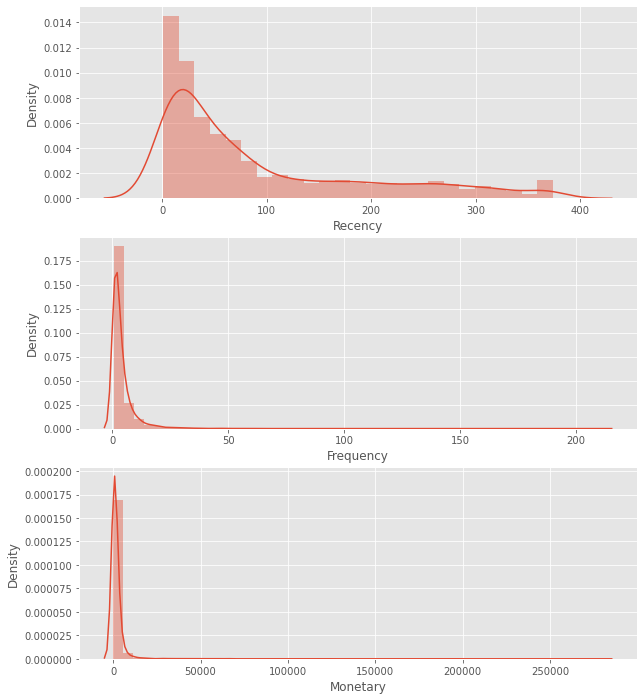

In [193]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_df_1.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_df_1.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_df_1.Monetary, label = 'Monetary')
plt.show()

DATA MODELING :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [194]:
df_transform = rfm_df_1[['Recency', 'Frequency', 'Monetary']]

In [173]:
df_transform['log_recency'] = np.log(df_transform['Recency'])
df_transform['log_frequency'] = np.log(df_transform['Frequency'])
df_transform['log_monetary'] = np.log(df_transform['Monetary'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5408\181439614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transform['log_recency'] = np.log(df_transform['Recency'])
C:\Users\HP\AppData\Local\Temp\ipykernel_5408\181439614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transform['log_frequency'] = np.log(df_transform['Frequency'])
C:\Users\HP\AppData\Local\Temp\ipykernel_5408\181439614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [174]:
df_transform.head()

,Recency,Frequency,Monetary,log_recency,log_frequency,log_monetary
CustomerID,,,,,,
12346,326,1,77183.60,5.786897,0.000000,11.253942
12347,2,7,4310.00,0.693147,1.945910,8.368693
12348,75,4,1797.24,4.317488,1.386294,7.494007
12349,19,1,1757.55,2.944439,0.000000,7.471676
12350,310,1,334.40,5.736572,0.000000,5.812338


In [175]:
df_transform.describe()

,Recency,Frequency,Monetary,log_recency,log_frequency,log_monetary
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.557630,4.251498,2048.688081,3.769051,0.942932,6.585704
std,100.010569,7.643525,8985.230220,1.430187,0.898849,1.261763
min,1.000000,1.000000,3.750000,0.000000,0.000000,1.321756
25%,18.000000,1.000000,306.482500,2.890372,0.000000,5.725161
50%,51.000000,2.000000,668.570000,3.931826,0.693147,6.505141
75%,142.000000,5.000000,1660.597500,4.955827,1.609438,7.414933
max,374.000000,211.000000,280206.020000,5.924256,5.351858,12.543280


In [176]:
df_log = df_transform[['log_recency','log_frequency','log_monetary']]
df_log.head()

,log_recency,log_frequency,log_monetary
CustomerID,,,
12346,5.786897,0.000000,11.253942
12347,0.693147,1.945910,8.368693
12348,4.317488,1.386294,7.494007
12349,2.944439,0.000000,7.471676
12350,5.736572,0.000000,5.812338


In [71]:
df_log.to_excel("Tableau_1.xlsx")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

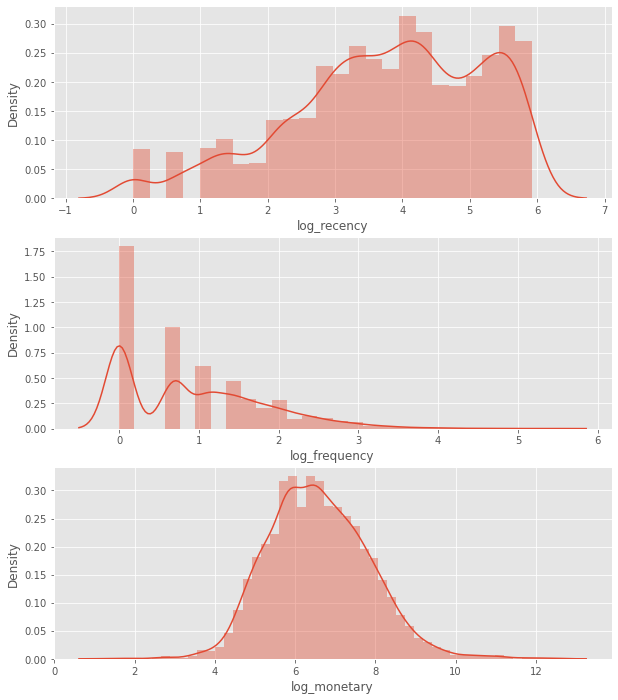

In [159]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(df_log.log_recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(df_log.log_frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(df_log.log_monetary, label = 'Monetary')
plt.show()

a.Standardize the Data

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [216]:
df_scaler = scaler.fit_transform(df_log)
#df_scaler = df_scaler([['Recency_scale','Frequency_scale','Monetary_scale']])
df_std = pd.DataFrame(df_scaler).round(5)
df_std.head()

,0,1,2
0,1.41106,-1.04916,3.70020
1,-2.15095,1.11598,1.41326
2,0.38352,0.49331,0.71995
3,-0.57664,-1.04916,0.70225
4,1.37587,-1.04916,-0.61300


In [217]:
df_std = df_std.rename(columns={0:"Recency", 1:"Frequency", 2:"Monetary"})

In [218]:
df_std.describe().round(5)

,Recency,Frequency,Monetary
count,4338.00000,4338.00000,4338.00000
mean,-0.00000,0.00000,-0.00000
std,1.00012,1.00011,1.00012
min,-2.63566,-1.04916,-4.17238
25%,-0.61445,-1.04916,-0.68209
50%,0.11383,-0.27793,-0.06386
75%,0.82990,0.74160,0.65728
max,1.50711,4.90565,4.72217


KMeans Clustering Process

In [202]:
from sklearn.cluster import KMeans

In [261]:
 k_value = range(1,9)
inertias=[]
for k in k_value :
    clusters = KMeans(n_clusters=k,random_state=1)
    clusters.fit(df_std)
    inertias.append(clusters.inertia_)

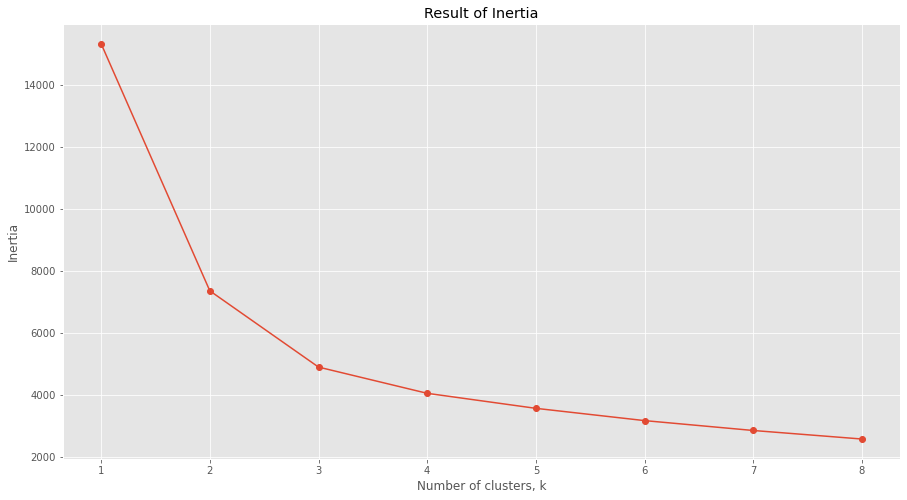

In [262]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(k_value, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Result of Inertia')
plt.show()

In [274]:
inertias

[15329.951761644152,
 7352.474744327319,
 4891.067503897968,
 4044.4299354619798,
 3559.4033999047333,
 3163.44928137662,
 2844.575667119622,
 2568.939675300047]

In [278]:
er_in = pd.DataFrame(inertias).round(2).reset_index().rename(columns={0:'Error'})
in_count = pd.DataFrame(range(1,8)).reset_index().rename(columns={0:'Number of Inertias'})
error_k = pd.merge(er_in,in_count,on='index').drop('index',axis=1)
error_k

,Error,Number of Inertias
0,15329.95,1
1,7352.47,2
2,4891.07,3
3,4044.43,4
4,3559.40,5
5,3163.45,6
6,2844.58,7


In [279]:
error_k.to_excel("Tableau_Error.xlsx")

1.b. Decide the optimum number of clusters to be formed.

In [255]:
clusters = KMeans(n_clusters= 3, random_state=1)
clusters.fit(df_std)

KMeans(n_clusters=3, random_state=1)

In [256]:
Cluster_labels = clusters.labels_
clusters.cluster_centers_

array([[-1.23856201,  1.5469279 ,  1.37951438,  3.        ],
       [-0.22424596,  0.20878917,  0.22762372,  0.64965986],
       [ 0.73480127, -0.84849764, -0.79691651,  2.        ]])

Labeling the Clusters

In [257]:
df_std["K_Clusters"] = clusters.labels_
df_std.head()

,Recency,Frequency,Monetary,K_Clusters
0,1.41106,-1.04916,3.70020,1
1,-2.15095,1.11598,1.41326,0
2,0.38352,0.49331,0.71995,1
3,-0.57664,-1.04916,0.70225,1
4,1.37587,-1.04916,-0.61300,2


In [258]:
df_std.describe().round(5)

,Recency,Frequency,Monetary,K_Clusters
count,4338.00000,4338.00000,4338.00000,4338.00000
mean,-0.00000,0.00000,-0.00000,1.24389
std,1.00012,1.00011,1.00012,0.73075
min,-2.63566,-1.04916,-4.17238,0.00000
25%,-0.61445,-1.04916,-0.68209,1.00000
50%,0.11383,-0.27793,-0.06386,1.00000
75%,0.82990,0.74160,0.65728,2.00000
max,1.50711,4.90565,4.72217,2.00000


In [244]:
df_std.to_excel("Tableau_RFM.xlsx")

In [259]:
cluster_counts = df_std.groupby("K_Clusters").agg({"K_Clusters":"count"})
cluster_counts = cluster_counts.rename(columns = {"K_Clusters":"Counts"})
cluster_counts.head()

,Counts
K_Clusters,
0,758
1,1764
2,1816


c.Analyze these clusters and comment on the results

Scatter 3D plot for RFM analysis and cluster with centroid

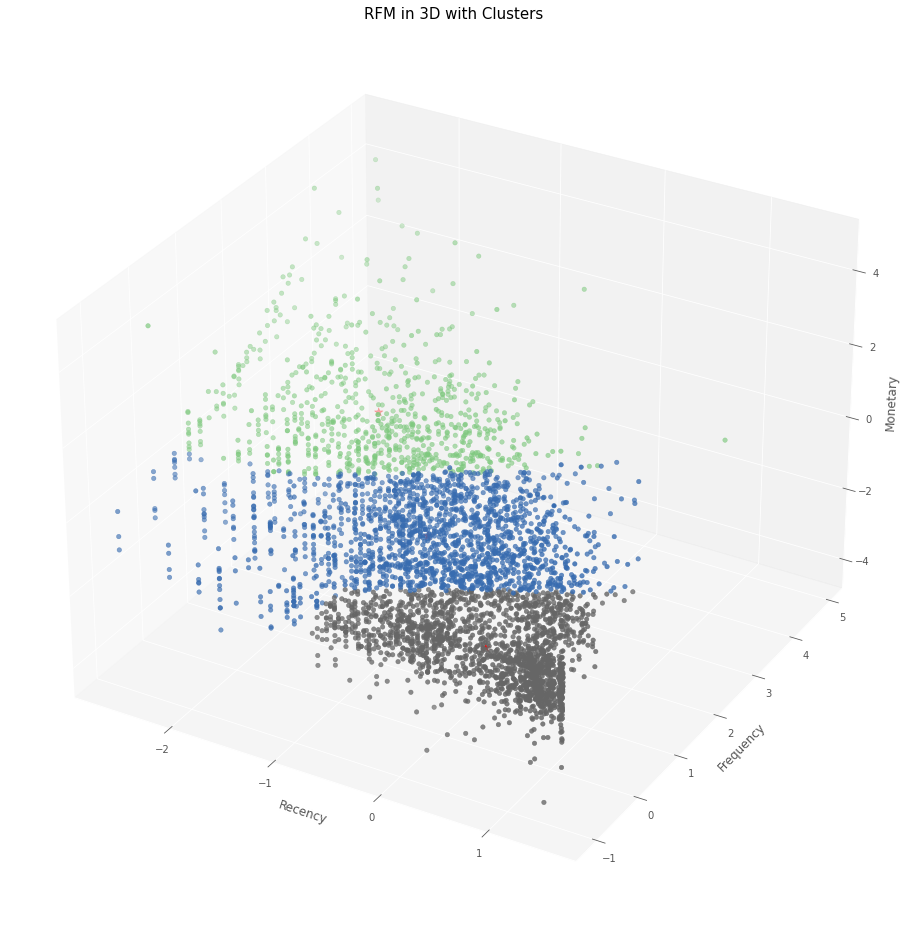

In [260]:
fig = plt.figure(figsize = (16, 20))
ax = plt.axes(projection ="3d")
ax.scatter3D(df_std['Recency'], df_std['Frequency'], df_std['Monetary'],c = df_std['K_Clusters'],cmap='Accent')
ax.scatter3D(clusters.cluster_centers_[:,0],clusters.cluster_centers_[:,1],clusters.cluster_centers_[:,2],color='red',marker='*',s = 80)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()